In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import operator
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from pandas.tools.plotting import autocorrelation_plot

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Cleaned.csv',header=0,parse_dates=True,index_col='Year',date_parser=dateparse, low_memory=False) 
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [3]:
indicator_data.reset_index()
indicator_data.head()

,CountryName,CountryCode,IndicatorCode,Value,Value Description
Year,,,,,
2016-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2015-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2014-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.335712,Agricultural land (% of land area)
2013-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.518049,Agricultural land (% of land area)
2012-01-01,Argentina,AR,AG.LND.AGRI.ZS,54.538146,Agricultural land (% of land area)


In [4]:
India_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                               (indicator_data['CountryCode'] == 'IN')]

In [5]:
India_df_ind1.index

DatetimeIndex(['2016-01-01', '2015-01-01', '2014-01-01', '2013-01-01',
               '2012-01-01', '2011-01-01', '2010-01-01', '2009-01-01',
               '2008-01-01', '2007-01-01', '2006-01-01', '2005-01-01',
               '2004-01-01', '2003-01-01', '2002-01-01', '2001-01-01',
               '2000-01-01', '1999-01-01', '1998-01-01', '1997-01-01',
               '1996-01-01', '1995-01-01', '1994-01-01', '1993-01-01',
               '1992-01-01', '1991-01-01', '1990-01-01', '1989-01-01',
               '1988-01-01', '1987-01-01', '1986-01-01', '1985-01-01',
               '1984-01-01', '1983-01-01', '1982-01-01', '1981-01-01',
               '1980-01-01', '1979-01-01', '1978-01-01', '1977-01-01',
               '1976-01-01', '1975-01-01', '1974-01-01', '1973-01-01',
               '1972-01-01', '1971-01-01', '1970-01-01', '1969-01-01',
               '1968-01-01', '1967-01-01', '1966-01-01', '1965-01-01',
               '1964-01-01', '1963-01-01', '1962-01-01', '1961-01-01',
      

In [7]:
ts = India_df_ind1['Value'] 
ts1 = India_df_ind1[['Value']].copy() 
ts1.head()

,Value
Year,
2016-01-01,60.406499
2015-01-01,60.406499
2014-01-01,60.406499
2013-01-01,60.410535
2012-01-01,60.420626


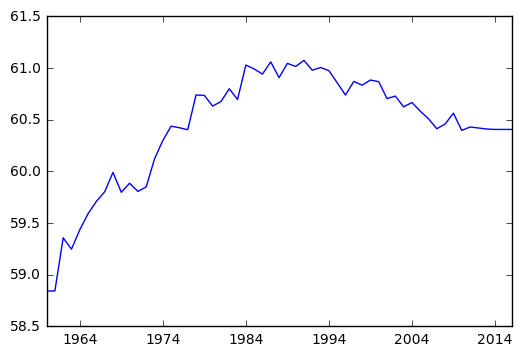

In [8]:
plt.plot(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


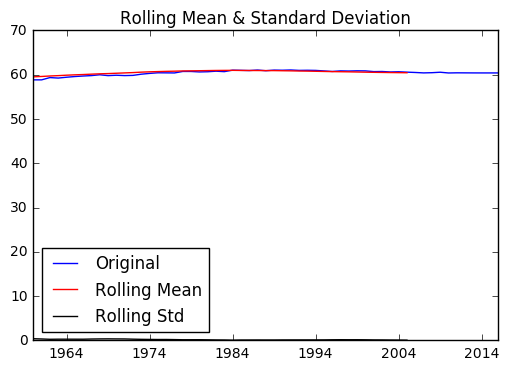

Results of Dickey-Fuller Test:
Test Statistic                  2.447611
p-value                         0.999031
#Lags Used                      1.000000
Number of Observations Used    55.000000
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
Critical Value (1%)            -3.555273
dtype: float64


In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
test_stationarity(ts1.Value)

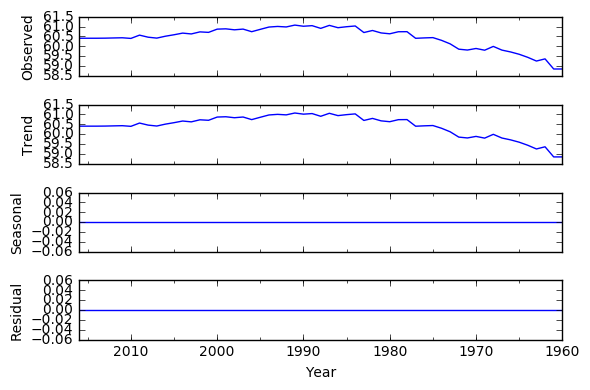

In [11]:
decomposition = sm.tsa.seasonal_decompose(ts1, model='additive')
fig = decomposition.plot()
plt.show()

## Taking Log

In [12]:
def logTransform(df):
    ts_log = np.log(df)
    plt.plot(ts_log)
    return ts_log

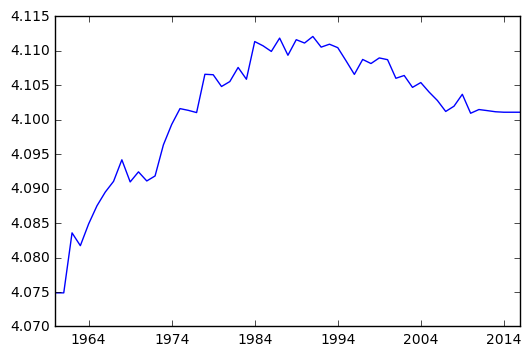

In [13]:
ts1_log = logTransform(ts1)

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


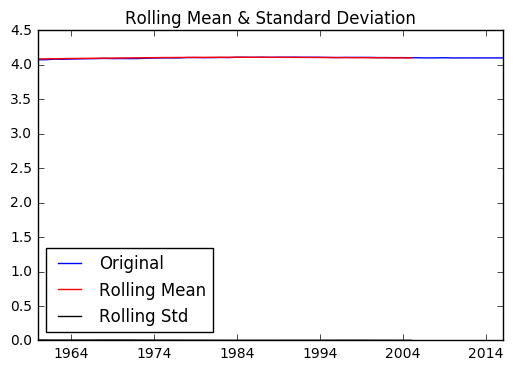

Results of Dickey-Fuller Test:
Test Statistic                  2.497782
p-value                         0.999049
#Lags Used                      1.000000
Number of Observations Used    55.000000
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
Critical Value (1%)            -3.555273
dtype: float64


In [14]:
test_stationarity(ts1_log.Value)

## Log first difference 

In [15]:
def logFirstDifference(ts1_log):
    ts1_log_diff = ts1_log - ts1_log.shift()
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


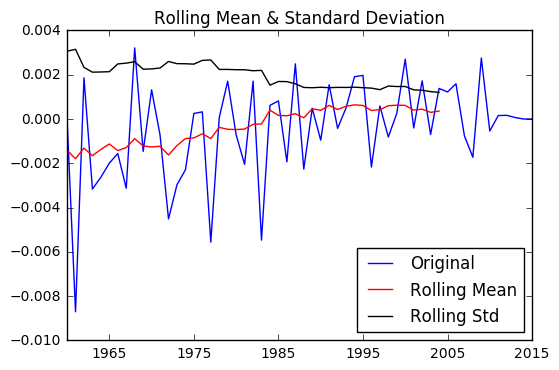

Results of Dickey-Fuller Test:
Test Statistic                -8.661134e+00
p-value                        4.819094e-14
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
Critical Value (1%)           -3.555273e+00
dtype: float64


In [16]:
ts1_log_diff = logFirstDifference(ts1_log)
test_stationarity(ts1_log_diff.Value)

## First difference 

In [17]:
def firstDifference(df):
    #ts_first_diff = df - df.shift()
    #ts_first_diff.dropna(inplace=True)
    ts_first_diff = df.diff()
    ts_first_diff.dropna(inplace=True)
    return ts_first_diff



C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


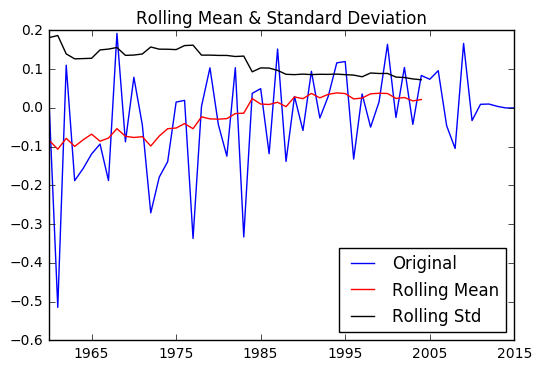

Results of Dickey-Fuller Test:
Test Statistic                -8.673813e+00
p-value                        4.471974e-14
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
Critical Value (1%)           -3.555273e+00
dtype: float64


In [18]:
ts1_first_diff = firstDifference(ts1)
test_stationarity(ts1_first_diff.Value)

In [19]:
def expWeightedavg(ts1):
    expwighted_avg = pd.ewma(ts1_log, halflife=12)
    ts_log_ewma_diff = ts1_log - expwighted_avg
    ts1_log_diff.dropna(inplace=True)
    return ts1_log_diff

C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(adjust=True,halflife=12,ignore_na=False,min_periods=0).mean()
  from ipykernel import kernelapp as app
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\priya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


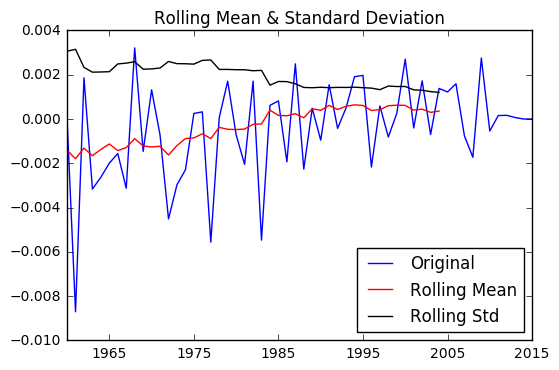

Results of Dickey-Fuller Test:
Test Statistic                -8.661134e+00
p-value                        4.819094e-14
#Lags Used                     0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
Critical Value (1%)           -3.555273e+00
dtype: float64


In [20]:
ts_log_ewma_diff = expWeightedavg(ts1)
test_stationarity(ts_log_ewma_diff.Value)

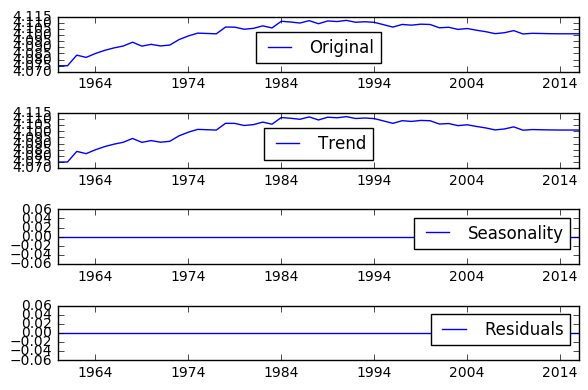

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts1_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [22]:
lag_acf = acf(ts1_log, nlags=10)
lag_pacf = pacf(ts1_log, nlags=10, method='ols')

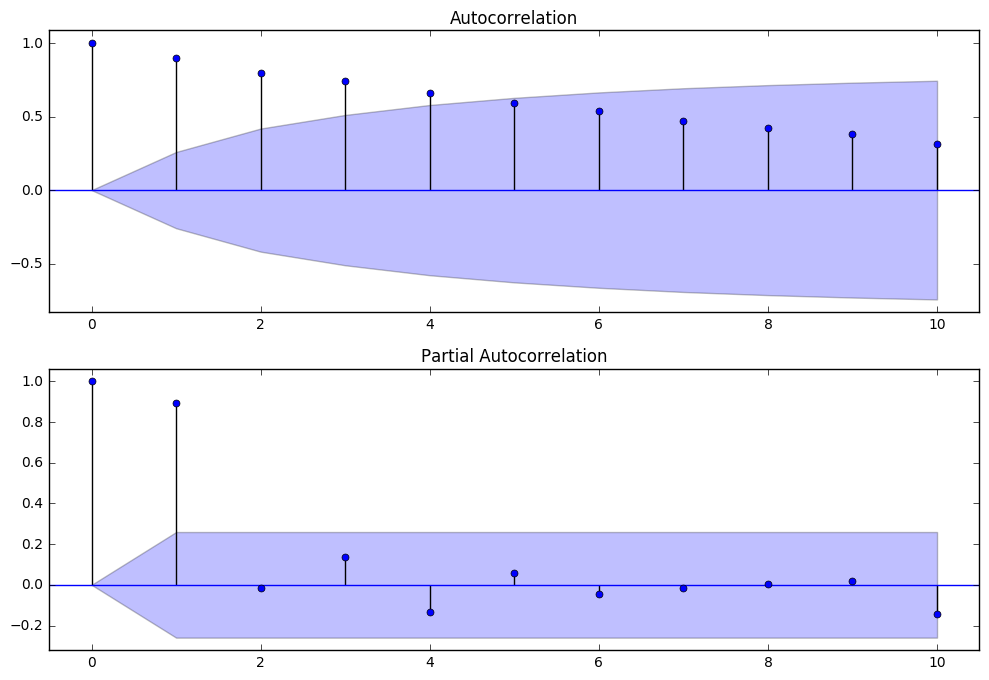

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts1_log, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts1_log, lags=10, ax=ax2)

- As seen from the graph above both ACF and PACF are geometric hence this is an ARMA model

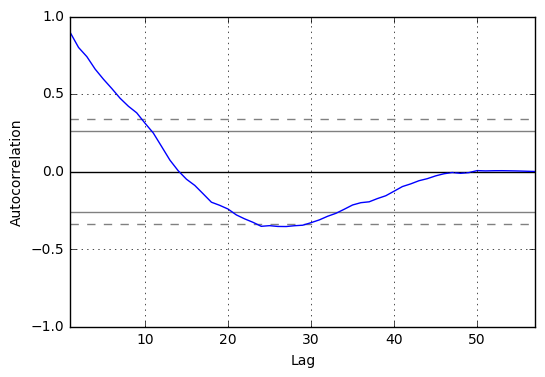

In [24]:
autocorrelation_plot(ts1_log)
plt.show()

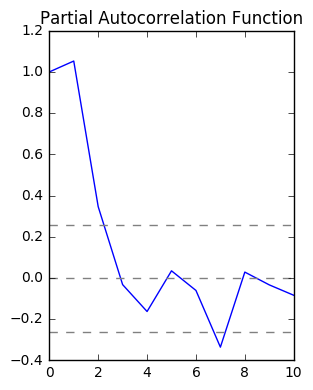

In [25]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts1_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [26]:
sm.tsa.arma_order_select_ic(ts1_log, max_ar=4, max_ma=2, ic='aic')

C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:492: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:493: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:494: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:495: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.p

{'aic':             0           1           2
 0 -368.848992 -424.965780 -452.318560
 1 -521.900295         NaN -213.417259
 2 -520.641719 -519.008800         NaN
 3         NaN -465.886065         NaN
 4 -510.313373         NaN -465.710029, 'aic_min_order': (1, 0)}

In [27]:
aic_metric = pd.DataFrame({'Modelname':[],'AIC':[]})
aic_dict = {}

In [28]:
def cal_aic_metric(modelname,model):
    global aic_metric
    AIC = model.aic
    aic_dict[modelname] = AIC
    df_error = pd.DataFrame({'Modelname':[modelname],'AIC':[AIC]})
    aic_metric = pd.concat([aic_metric,df_error])
    return aic_metric

In [35]:
def AR_Model(ts):
    model = ARIMA(ts, order=(1, 0, 0))
    results_AR = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2, 0, 0))',results_AR)
    print('Lag: %s' % results_AR.k_ar)
    print('Coefficients: %s' % results_AR.params)
    #print(results_AR.summary())
    predict_MA_HPI = np.exp(results_AR.predict(10, 10, dynamic=True))
    print(predict_MA_HPI)
    plt.plot(ts1_log)
    plt.plot(results_AR.fittedvalues, color='red')
    #print(np.exp(results_AR.fittedvalues))
    print(results_AR.aic)
    return results_AR

Lag: 1
Coefficients: const          4.091955
ar.L1.Value    0.985469
dtype: float64
2006-01-01    60.405104
Freq: -1AS-JAN, dtype: float64
-521.9002953207096


C:\Users\priya\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


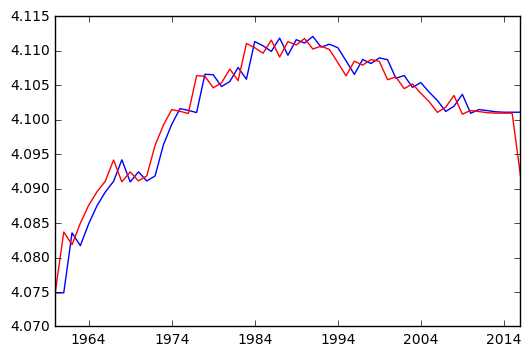

In [36]:
model_AR = AR_Model(ts1_log)

In [43]:
def MA_Model(ts):
    model = ARIMA(ts, order=(0,0, 2))
    results_MA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(0, 0, 5))',results_MA)
    print('Lag: %s' % results_MA.k_ar)
    print('Coefficients: %s' % results_MA.params)
    print(results_MA.summary())
    plt.plot(ts)
    plt.plot(results_MA.fittedvalues, color='red')
    return results_MA

Lag: 0
Coefficients: const          4.101139
ma.L1.Value    1.260167
ma.L2.Value    0.630551
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(0, 2)   Log Likelihood                 230.159
Method:                       css-mle   S.D. of innovations              0.004
Date:                Fri, 18 Aug 2017   AIC                           -452.319
Time:                        11:51:03   BIC                           -444.146
Sample:                    01-01-2016   HQIC                          -449.143
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.1011      0.002   2590.979      0.000         4.098     4.104
ma.L1.Value     1.26

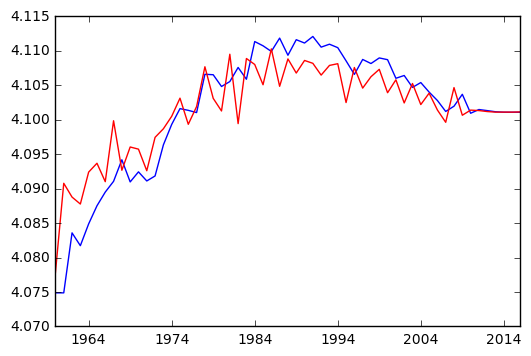

In [44]:
model_MA = MA_Model(ts1_log)

In [47]:
def Combined_Model(ts):
    model = ARIMA(ts, order=(2, 0, 0))  
    results_ARIMA = model.fit(disp=0)
    cal_aic_metric('ARIMA(ts, order=(2,0, 5))',results_ARIMA)
    print('Lag: %s' % results_ARIMA.k_ar)
    print('Coefficients: %s' % results_ARIMA.params)
    print(results_ARIMA.summary())
    plt.plot(ts)
    plt.plot(results_ARIMA.fittedvalues, color='red')
    return results_ARIMA

Lag: 2
Coefficients: const          4.091289
ar.L1.Value    0.873472
ar.L2.Value    0.113901
dtype: float64
                              ARMA Model Results                              
Dep. Variable:                  Value   No. Observations:                   57
Model:                     ARMA(2, 0)   Log Likelihood                 264.321
Method:                       css-mle   S.D. of innovations              0.002
Date:                Fri, 18 Aug 2017   AIC                           -520.642
Time:                        11:51:27   BIC                           -512.470
Sample:                    01-01-2016   HQIC                          -517.466
                         - 01-01-1960                                         
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const           4.0913      0.012    335.756      0.000         4.067     4.115
ar.L1.Value     0.87

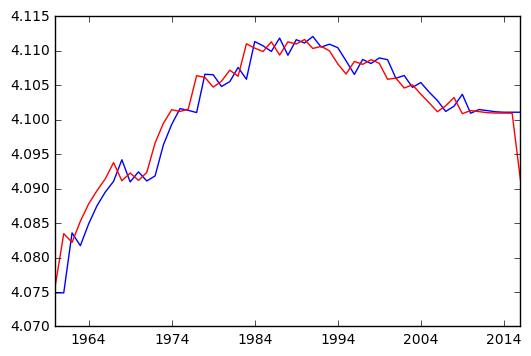

In [48]:
model_Combined = Combined_Model(ts1_log)

In [49]:
best_model =  min(aic_dict.items(),key=operator.itemgetter(1))[0]
print('Best Model is ', best_model)

Best Model is  ARIMA(ts, order=(2, 0, 0))


In [50]:
aic_metric

,AIC,Modelname
0,-521.900295,"ARIMA(ts, order=(2, 0, 0))"
0,-520.641719,"ARIMA(ts, order=(2, 0, 0))"
0,-521.900295,"ARIMA(ts, order=(2, 0, 0))"
0,-424.965780,"ARIMA(ts, order=(0, 0, 5))"
0,-452.318560,"ARIMA(ts, order=(0, 0, 5))"
0,-452.318560,"ARIMA(ts, order=(0, 0, 5))"
0,-520.641719,"ARIMA(ts, order=(2,0, 5))"


In [51]:
#Forecast using Best Model
def forecast(model,numSteps):
    #model.forecast(steps=numSteps)
    output = model.forecast(steps=numSteps)[0]
    #output.tolist()
    #output=normal(output)
    output = np.exp(output)
    return output

In [52]:
forecast(model_AR,5)

array([ 58.8577996 ,  58.87219518,  58.88638503,  58.90037204,  58.91415906])

In [53]:
def FittedValues(model):
    fittedVal=model.fittedvalues
    #PredictedVal=normal(fittedVal)
    #PredictedVal= fittedVal.tolist()
    fittedVal = np.exp(fittedVal)
    print('Predicted existing values are:')
    return fittedVal
FittedValues(model_AR)


Predicted existing values are:


Year
2016-01-01    59.856770
2015-01-01    60.398475
2014-01-01    60.398475
2013-01-01    60.398475
2012-01-01    60.402452
2011-01-01    60.412395
2010-01-01    60.421674
2009-01-01    60.389527
2008-01-01    60.553571
2007-01-01    60.450506
2006-01-01    60.405104
2005-01-01    60.499885
2004-01-01    60.572792
2003-01-01    60.655309
2002-01-01    60.613554
2001-01-01    60.716615
2000-01-01    60.692424
1999-01-01    60.854136
1998-01-01    60.869379
1997-01-01    60.820667
1996-01-01    60.856124
1995-01-01    60.726225
1994-01-01    60.844195
1993-01-01    60.958848
1992-01-01    60.989002
1991-01-01    60.963487
1990-01-01    61.056599
1989-01-01    60.999274
1988-01-01    61.028434
1987-01-01    60.892575
1986-01-01    61.042350
1985-01-01    60.926043
1984-01-01    60.975085
1983-01-01    61.012197
1982-01-01    60.684139
1981-01-01    60.786536
1980-01-01    60.663925
1979-01-01    60.621176
1978-01-01    60.723242
1977-01-01    60.727219
1976-01-01    60.395493
1975-01-01 

In [62]:
def normal(predictions_ARIMA_diff):
    #predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
    predictions_ARIMA_diff_cumsum = np.cumsum(np.concatenate((ts1.values[0], predictions_ARIMA_diff)))
    print('normalized')
    #predictions_ARIMA_diff_cumsum=np.absolute(predictions_ARIMA_diff_cumsum)
    return predictions_ARIMA_diff_cumsum